##**Importando ferramentas**

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf

##**Importação dos dados**

In [ ]:
df = pd.read_csv('metrics_7.csv')
df.head()

,_id,available,cpu_usage,heap_used,memory_used,non_heap_used,time,time_response_get,time_response_post
0,627cefdbf7301dd01a1e36b2,1,0.0,0.0,0.0,0.0,1.652355e+09,0.0,0.0
1,627cefe7f7301dd01a1e36b3,1,0.0,0.0,0.0,0.0,1.652355e+09,0.0,0.0
2,628f5f6b52016e4226c5a3da,1,0.0,0.0,0.0,0.0,1.653563e+09,0.0,0.0
3,628f5ffd9dc9c74e6963bf69,1,0.0,0.0,0.0,0.0,1.653563e+09,0.0,0.0
4,628f60089dc9c74e6963bf6a,1,0.0,0.0,0.0,0.0,1.653563e+09,0.0,0.0


##**Tratamento dos dados**

In [ ]:
cols = ['time_response_get',
'time_response_post',
'memory_used',
'heap_used',
'non_heap_used',
'cpu_usage']

df = df.fillna(0)
df = df.astype({'time_response_get': float, 
                'time_response_post': float, 
                'cpu_usage': float, 
                'available': float, 
                'memory_used': float, 
                'heap_used': float, 
                'non_heap_used': float
                })

i = 0
while i < len(df['time_response_get']):
  col_values = []
  for column in cols:
    if df[column][i] != 0:
      col_values.append(df[column][i])
  if len(col_values) == 0:
    df['available'][i] = 0
  else:
    df['available'][i] = 1
  i = i + 1

df['available'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


array([0., 1.])

##**Plot da autocorrelação**

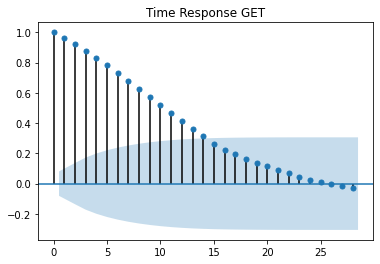

In [ ]:
plot_acf(df['time_response_get'], title='Time Response GET');

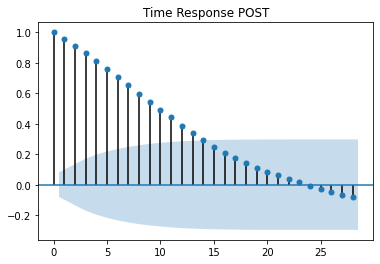

In [ ]:
plot_acf(df['time_response_post'], title='Time Response POST');

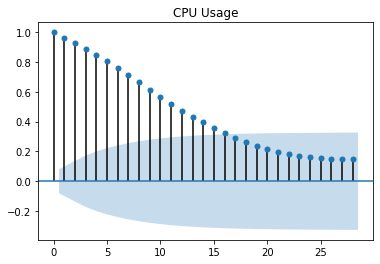

In [ ]:
plot_acf(df['cpu_usage'], title='CPU Usage');

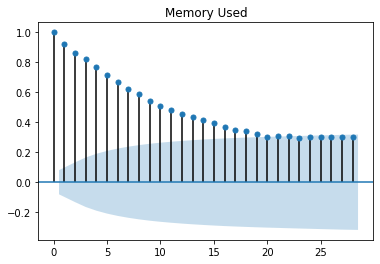

In [ ]:
plot_acf(df['memory_used'], title='Memory Used');

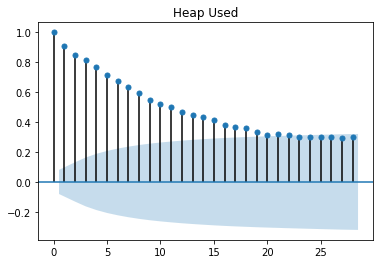

In [ ]:
plot_acf(df['heap_used'], title='Heap Used');

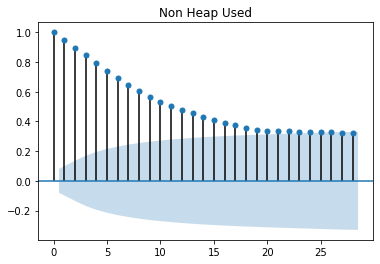

In [ ]:
plot_acf(df['non_heap_used'], title='Non Heap Used');

##**Cálculo de correlação entre colunas** 

In [ ]:
cols = ['time_response_get',
'time_response_post',
'memory_used',
'heap_used',
'non_heap_used',
'cpu_usage', 'available']

correlations = []
for col1 in cols:
  for col2 in cols:
    if col1 != col2:
      corr = np.corrcoef(df[col1], df[col2])[0][1]
      if f'{col1}{col2}' not in correlations and f'{col2}{col1}' not in correlations:
        correlations.append(f'{col1}{col2}')
        correlations.append(f'{col2}{col1}')
        print(f'CORRELAÇÃO ENTRE {col1} e {col2}: {corr}')

CORRELAÇÃO ENTRE time_response_get e time_response_post: 0.21187186291127014
CORRELAÇÃO ENTRE time_response_get e memory_used: 0.2516991382371547
CORRELAÇÃO ENTRE time_response_get e heap_used: 0.2454689277674406
CORRELAÇÃO ENTRE time_response_get e non_heap_used: 0.23482215380379065
CORRELAÇÃO ENTRE time_response_get e cpu_usage: 0.3829583828048052
CORRELAÇÃO ENTRE time_response_get e available: 0.35570470566746554
CORRELAÇÃO ENTRE time_response_post e memory_used: 0.2405024733675622
CORRELAÇÃO ENTRE time_response_post e heap_used: 0.23354782586505682
CORRELAÇÃO ENTRE time_response_post e non_heap_used: 0.22769586739055667
CORRELAÇÃO ENTRE time_response_post e cpu_usage: 0.39289082652131047
CORRELAÇÃO ENTRE time_response_post e available: 0.3885479724010192
CORRELAÇÃO ENTRE memory_used e heap_used: 0.9868221994227477
CORRELAÇÃO ENTRE memory_used e non_heap_used: 0.8952023167697696
CORRELAÇÃO ENTRE memory_used e cpu_usage: 0.7797362268919987
CORRELAÇÃO ENTRE memory_used e available: 0.